<a href="https://colab.research.google.com/github/sanskruti6/Cat-Dog-Classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 109ms/step - loss: 1.6084 - accuracy: 0.5714 - val_loss: 0.6893 - val_accuracy: 0.5658
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5927 - accuracy: 0.6869 - val_loss: 0.6235 - val_accuracy: 0.6616
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4915 - accuracy: 0.7602 - val_loss: 0.5469 - val_accuracy: 0.7312
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4292 - accuracy: 0.8023 - val_loss: 0.4629 - val_accuracy: 0.7716
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3793 - accuracy: 0.8272 - val_loss: 0.5107 - val_accuracy: 0.7560
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3292 - accuracy: 0.8555 - val_loss: 0.4291 - val_accuracy: 0.8140
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2622 - accuracy: 0.8858 - val_loss: 0.5973 - val_ac

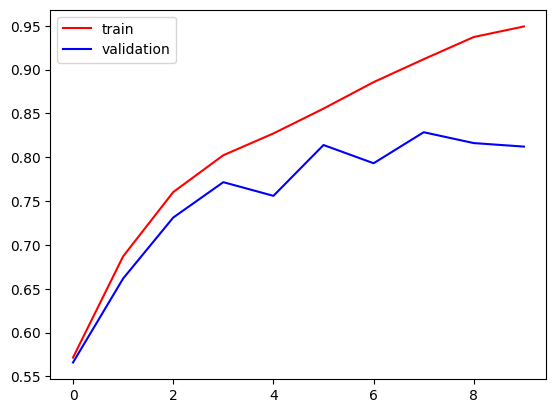

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

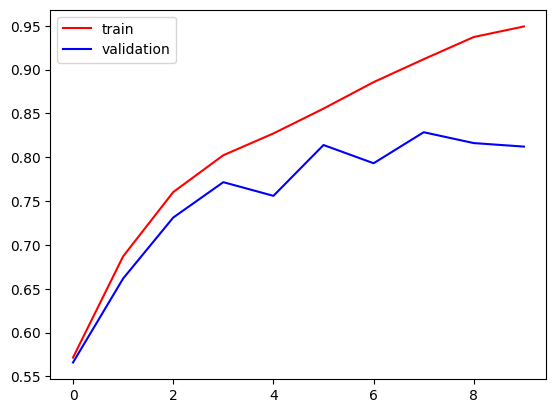

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

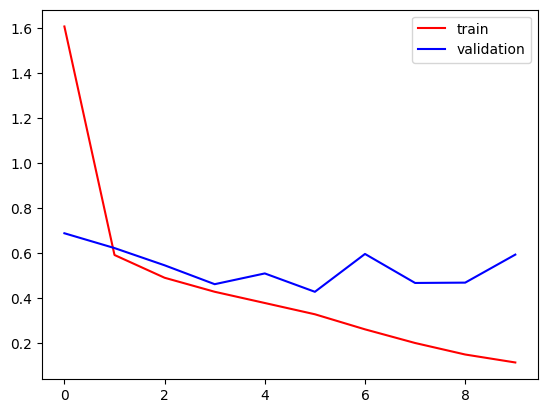

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

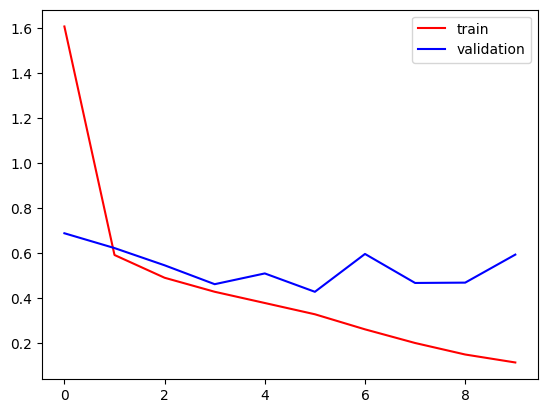

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/cat.jpg')

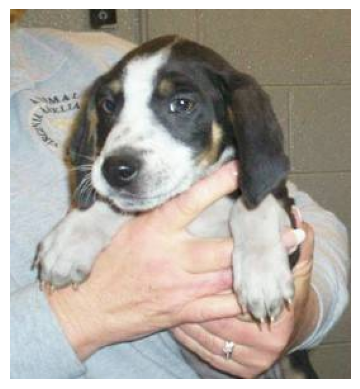

In [37]:
import cv2
import matplotlib.pyplot as plt

# Replace 'image_path.jpg' with the actual image file path
image_path = '/content/train/dogs/dog.10.jpg'

# Load image data using OpenCV
img_data = cv2.imread(image_path)

# Check if the image was loaded successfully
if img_data is not None:
    # Convert BGR to RGB (Matplotlib expects RGB format)
    img_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("Image could not be loaded.")


In [38]:
img_rgb.shape

(292, 269, 3)

In [39]:
img_rgb = cv2.resize(img_rgb,(256,256))

In [40]:
test_input = img_rgb.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)